# CNN para classificar Fashion MNIST
Este experimento tem a finalidade de exemplificar classificação de imagens utilizando o algorítimo de CNN e utilizando o TensorFlow para criar esta rede neural.
Para maiores detalhes, acesse os links abaixo:
- <a href="https://en.wikipedia.org/wiki/Convolutional_neural_network">CNN</a>
- <a href="https://www.tensorflow.org">TensorFlow</a>


## Para rodar o experimento

Deve-se instalar o Anaconda, para isso basta seguir os passos deste <a href="https://docs.anaconda.com/anaconda/install/linux/">link</a>. E após, seguir os passos abaixo em seu terminal.

### Passo 1

Criar um "enviroment" de pacotes python usando anaconda, chamando os comandos abaixo na sequência: 

conda create --name tf_p37 python=3.7 pandas numpy matplotlib.

conda activate tf_p37

### Passo 2

Instalar o TensorFlow para fazermos uso do mesmo, chamando o comando abaixo:

conda install -c anaconda tensorflow


## Passo 1

Preparando os dados para passar para a CNN

### Baixando os dados

Baixa aqui as imagens que representam os roupas que vamos classificar, os dados são o dataset <a href="https://www.openml.org/d/40996">Fashion MNIST</a>.

Aqui, para fazer isso, vamos chamar uma função de uma biblioteca do framework TensorFlow chamada Keras.

Keras foi incorporada do Tensorflow em sua versão 2.0, e ajuda nós, que trabalhamos com isso, a criar RN de uma forma mais simples, e menos verbosa.

Outro ponto interessante do uso do keras, a função que baixa os dados já separa os mesmos entre dados para treinamento e dados para testes.

In [1]:
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
# Lê o dataset
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Visualizando as imagens

Vamos agora visualizar algumas das imagens que buscamos, e tambem consultar o seu tamanho.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


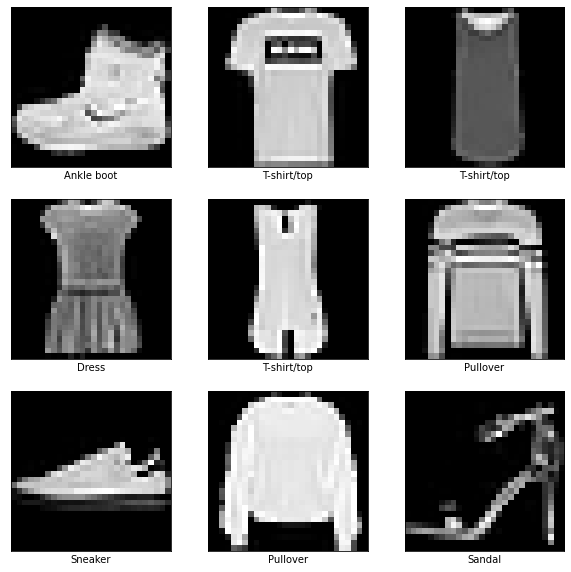

In [4]:
# mostra o tamanho das imagens
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

fig, axs = plt.subplots(3,3,figsize=(10,10))

# mostra as 9 primieras imagens
for i in range(9):
    # define subplot
    ax = axs[i // 3, i % 3]
    ax.set_yticks([])
    ax.set_xticks([])
    
	# plota a imagem
    ax.imshow(trainX[i], cmap=plt.get_cmap('gray'))

    ax.set_xlabel(class_names[trainY[i]])

# mostra a figura com as 9
plt.show()

### Tratando os dados para a CNN
Os algorítimos de ML são muito sensíveis aos dados que são usados. E neste experimento, vamos tomar alguns cuidados:
- Vamos converter os valores das classes para um vetor de possibilidades, onde cada classe passa a ter uma posição, e com isso a classe que tiver o maior valor, vai ser a classe daquele X
- Vamos também normalizar os valores, pois como são imagens, seu valor máximo de pixel é 255, e para uma RN, variar muito assim (de 0 a 255), pode representar erros, então normalizaremos para variar entre 0 e 1.

#### 1. Converte os dados para hot encoders

Para isso chama uma função do próprio keras, chamada "to_categorical"

In [5]:
# vamos executar um reshape no dataset
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# vams converter os dados originais para hot encoders
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

# De novo mostraremos o tamanho dos dados
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


#### 2. Normaliza os valores para variarem de 0 a 1

In [6]:
# prep_pixels

# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

## Passo 2

Aqui vamos criar o modelo, executar o treinamento

### 1. Criando o modelo

Aqui vamos criar a CNN e fazendo uso do framework Tensorflow para isso. 

Vale comentar alguns pontos,
- Não crio aqui um modelo diretamente, eu crio uma função para definí-lo, isso vai ser útil abaixo
- Com o uso do Keras, ele nos permite criar a RN nivel a nível, e definindo como o nível vai funcionar
- No nosso exemplo aqui, nossa arquitetura será:
    - Conv2D: Vamos aqui introduzir a parte convolucional da rede neural, onde será aplicados os filtros para extração das características
    - MaxPooling2D: Onde vamos aplicar a camada de pooling, onde teremos uma redução de dados
    - Flatten: Onde vamos converter os dados tranformados da imagem, que até aqui estão em formado matricial, para um vetor de números, e assim passarmos para a o MLP que vem a seguir
    - Camadas Dense: São duas camandas de uma MLP, como já vimos. E aqui o interessante é perceber que existem 10 neurônios no final da rede, isso porque temos 10 classes possiveis para classificarmos
- E ao final, é executada a compilação do modelo criado, isso para que a rede possa receber os 

Vale lembrar que é possível configurar muitos outros parâmetros e leyers, bsta dar uma conferida na documentação do próprio <a href="https://www.tensorflow.org/">TensorFlow</a> para maiores detalhes.

In [7]:
def CreateModel():
    # Definimos o modelo
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    # compilamos o modelo, deixando ele preparado para receber os dados de treinamento
    opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

### 2. Executando o modelo

Aqui vamos executar o modelo que criamos acima, e após fazermos isso, vamos guardar o modelo para uso posterior, poupando tempo de novo treinamento.

Por vezes é muito necessário compartilhar o modelo "treinando" entre dispositívos, colaboradores ou máquinas, para isso podemos usar funções do próprio TensorFlow para isso. 

Para maiores detalhes, acesse este <a href="https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model">link</a>.

In [8]:
%%time
import os

isLoad = False

if (os.path.exists('saved_model')):
    print('Carregando modelo salvo ... ')

    model = tf.keras.models.load_model('saved_model/my_model')

    isLoad = True

else:
    print('Treinando o modelo e salvando ... ')

    os.mkdir('saved_model')
    model = CreateModel()
    fitRes = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
    model.save('saved_model/my_model')


Treinando o modelo e salvando ... 
Epoch 1/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.4165 - accuracy: 0.8510 - val_loss: 0.3396 - val_accuracy: 0.8739
Epoch 2/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2846 - accuracy: 0.8959 - val_loss: 0.2939 - val_accuracy: 0.8942
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2435 - accuracy: 0.9110 - val_loss: 0.2793 - val_accuracy: 0.8997
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2173 - accuracy: 0.9198 - val_loss: 0.2777 - val_accuracy: 0.8998
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1954 - accuracy: 0.9281 - val_loss: 0.2668 - val_accuracy: 0.9047
Epoch 6/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1756 - accuracy: 0.9353 - val_loss: 0.2914 - val_accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1603 - ac

## Passo 3

Aqui vamos executar a predição dos dados separados para teste, e analisar os resultados gerados

### 1. Analisando os resultados obtidos no modelo com os valores separados para teste

Com TensorFlow podemos conferir as metricas diretamente sem a necessidade de chamar a função para predizer os valores, como vimos abaixo.

In [9]:
_, acc = model.evaluate(testX, testY, verbose=2)
print('\nTest accuracy:', acc)

313/313 - 2s - loss: 0.2896 - accuracy: 0.9069

Test accuracy: 0.9068999886512756


Ainda ainalizando os modelos, se o modelo foi treinando nesta execução, podemos pegar os dados do historico de treinamnto (fitRes), e conferir como o modelo avança a cada interação quando a valores de erro (loss) e acurácia (accuracy), tanto para os dados de treinamento quanto de teste.

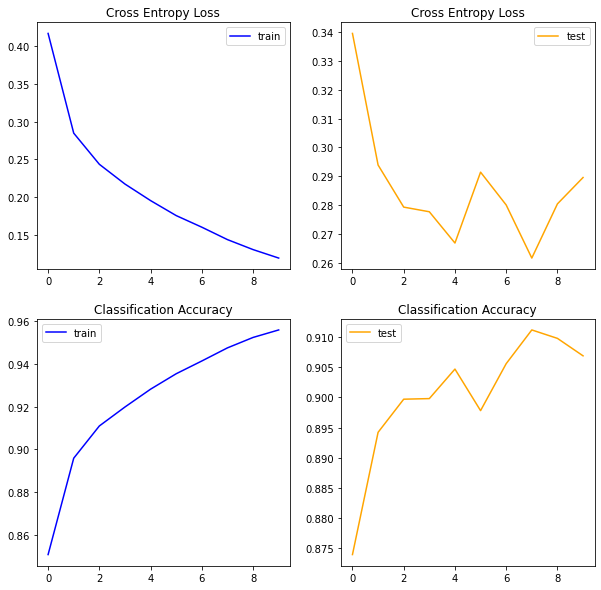

In [10]:
if not isLoad:

    fig, axs = plt.subplots(2,2,figsize=(10,10))

    ax = axs[0,0]
    ax.set_title('Cross Entropy Loss')
    ax.plot(fitRes.history['loss'], color='blue', label='train'); ax.legend()

    ax = axs[1,0]
    ax.set_title('Classification Accuracy')
    ax.plot(fitRes.history['accuracy'], color='blue', label='train'); ax.legend()

    ax = axs[0,1]
    ax.set_title('Cross Entropy Loss')
    ax.plot(fitRes.history['val_loss'], color='orange', label='test'); ax.legend()

    ax = axs[1,1]
    ax.set_title('Classification Accuracy')
    ax.plot(fitRes.history['val_accuracy'], color='orange', label='test'); ax.legend()

### Visualizando resultado

E finaliznado, vamos plotar algumas imagens que foram preditas para visualizarmos o resultado gerado!

Mas como nao chamamos a função para predizer valores antes, vamos fazer isso agora.

In [14]:
predY = model.predict(testX)

print('shape:', predY.shape)

shape: (10000, 10)


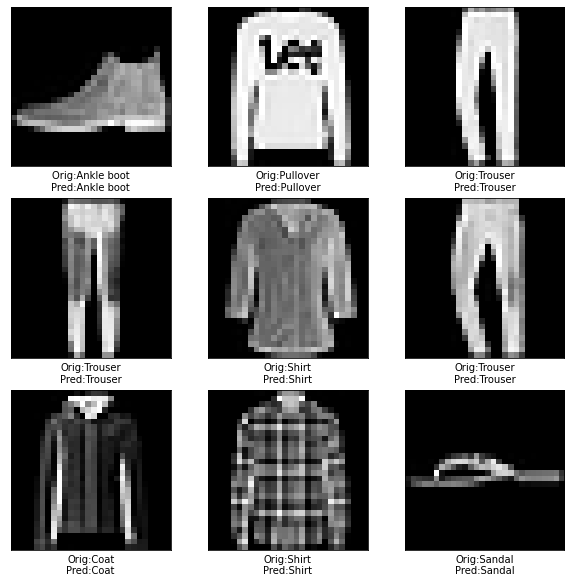

In [15]:
fig, axs = plt.subplots(3,3,figsize=(10,10))

# mostra as 9 primieras imagens
for i in range(9):
    # define subplot
    ax = axs[i // 3, i % 3]
    ax.set_yticks([])
    ax.set_xticks([])
    
	# plota a imagem
    ax.imshow(testX[i], cmap=plt.get_cmap('gray'))

    ax.set_xlabel(f'Orig:{class_names[np.argmax(testY[i])]}\nPred:{class_names[np.argmax(predY[i])]}')

# mostra a figura com as 9
plt.show()